# Logistic Regression

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [6]:
# Import the os module
import os
# Get the current working directory
cwd = os.getcwd()
print(cwd)

# Change the current working directory
os.chdir('C:/Users/javij/OneDrive/Documentos/GitHub/Material-CNBV/MOD 8/Datasets')

actual = os.getcwd()
print(actual)

C:\Users\javij\OneDrive\Documentos\GitHub\Material-CNBV\MOD 8\Datasets
C:\Users\javij\OneDrive\Documentos\GitHub\Material-CNBV\MOD 8\Datasets


In [7]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
yhat_prob = classifier.predict_proba(X_test)
yhat_prob

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456],
       [0.96395406, 0.03604594],
       [0.97081333, 0.02918667],
       [0.83936154, 0.16063846],
       [0.63040685, 0.36959315],
       [0.98450737, 0.01549263],
       [0.66506265, 0.33493735],
       [0.72016534, 0.27983466],
       [0.98774666, 0.01225334],
       [0.01139953, 0.98860047],
       [0.95799724, 0.04200276],
       [0.91070984, 0.08929016],
       [0.03668135, 0.96331865],
       [0.72304389, 0.27695611],
       [0.11787963, 0.88212037],
       [0.99551213, 0.00448787],
       [0.02704431, 0.97295569],
       [0.92232099, 0.07767901],
       [0.92371914, 0.07628086],
       [0.80661256, 0.19338744],
       [0.84341507, 0.15658493],
       [0.

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


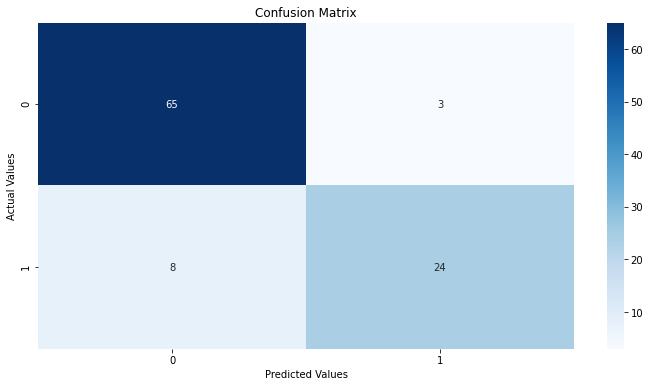

In [17]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [18]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


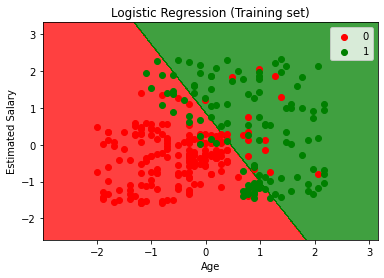

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

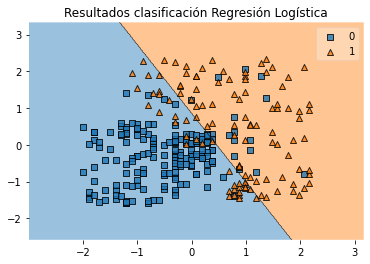

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train,
    y = y_train,
    clf = classifier,
    ax = ax
)
ax.set_title("Resultados clasificación Regresión Logística");

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


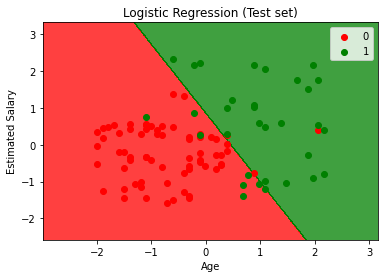

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

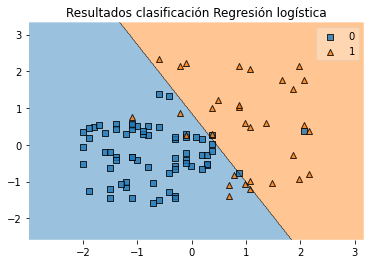

In [22]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_test,
    y = y_test,
    clf = classifier,
    ax = ax
)
ax.set_title("Resultados clasificación Regresión logística");